In [3]:
import warnings
warnings.filterwarnings('ignore')

### **Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **Загрузка данных**

In [4]:
df = pd.read_csv('./heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Описание:<br>
**1. age(возраст)**<br>
**2. sex:** (пол: 1 = мужчина; 0 = женщина)<br>
**3. cp:** тип боли в груди<br>
**4. trestbps:** давление (в мм ртутного столба)<br>
**5. chol:** уровень холестерина в сыворотке в мг / дл<br>
**6. fbs:** (уровень сахара в крови > 120 мг/дл) (1 = да; 0 = нет)<br>
**7. restecg:** результаты кардиоргаммы в покое<br>
**8. thalach:** максимальный пульс<br>
**9. exang:** стенокардия от физической нагрузи (1 - да, 2 - 0)<br>
**10. oldpeak**: Депрессия ST, вызванная физическими упражнениями относительно отдыха<br>
**11. slope:** наклон пика ST сегмента<br>
**12. ca:** количество крупных сосудов (0-3), окрашенных с помощью флюороскопии<br>
**13. thal:** 3 = нормально; 6 = исправленный дефект; 7 = обратимый дефект<br>
**14. target:** 1 or 0 <br>

### **Особенности набора**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Размерности набора**

In [6]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


**Проверка на пустые значения**

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Особенности:**

**1. Count** Количество непустых значений.<br>

**2. Mean** Медиана.<br>

**3. Std** Стандартное отклонение.<br>

**4. Min** Минимальное значение.<br>

**5. 25%**, **50%**, and **75%** Квантили уровня.<br>

**6. Max** Максимальное значение.<br>


### **Визуализация**

#### **1. Пол**

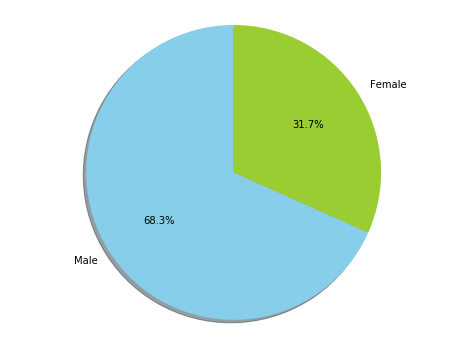

In [9]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

#### **2. Тип грудных болей**

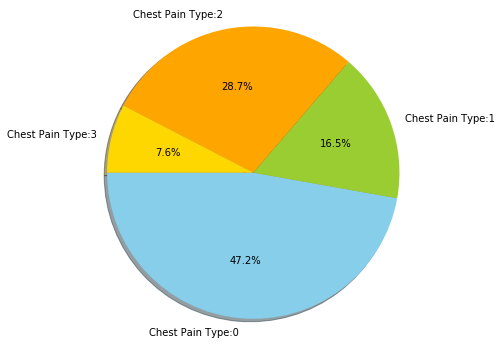

In [10]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

#### **3. Сахар в крови**

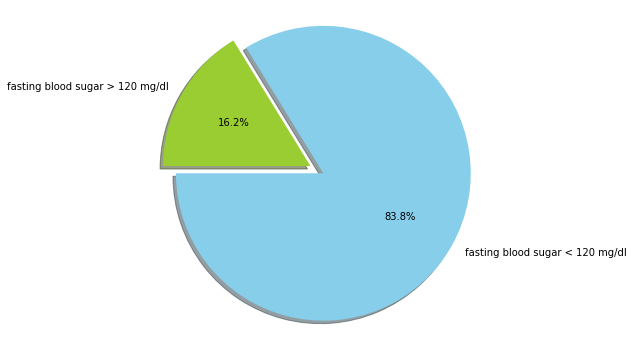

In [11]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

#### **4.exang: стенокардия от физической нагрузки**

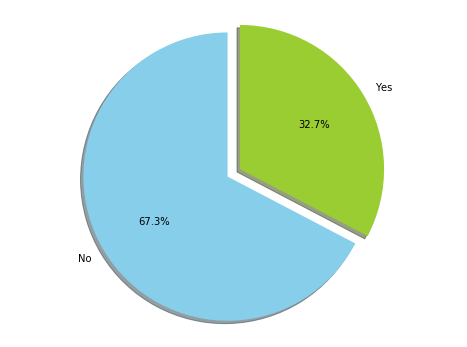

In [12]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

### **Разведывательный анализ данных**

In [2]:
sns.set_style('whitegrid')

#### **1. Heatmap**

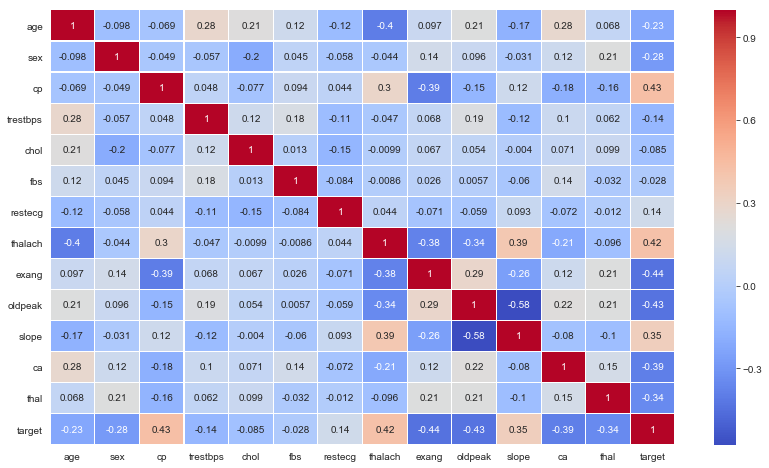

In [5]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

#### **Построение распределения различных атрибутов**

#### **1. thalach: максимальный пульс**

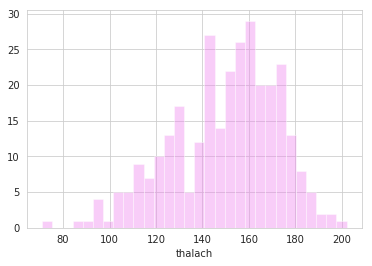

In [14]:
sns.distplot(df['thalach'],kde=False,bins=30,color='violet')

#### **2.chol: уровень холестерина в сыворотке в мг / дл **

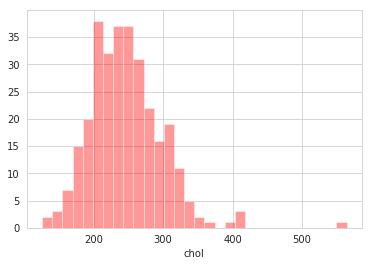

In [15]:
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

#### **3. trestbps: давление**

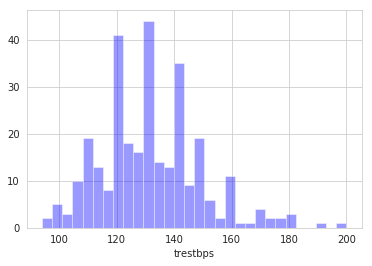

In [16]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

#### 4. Количество людей у которых проблемы с сердцем по возрастам 

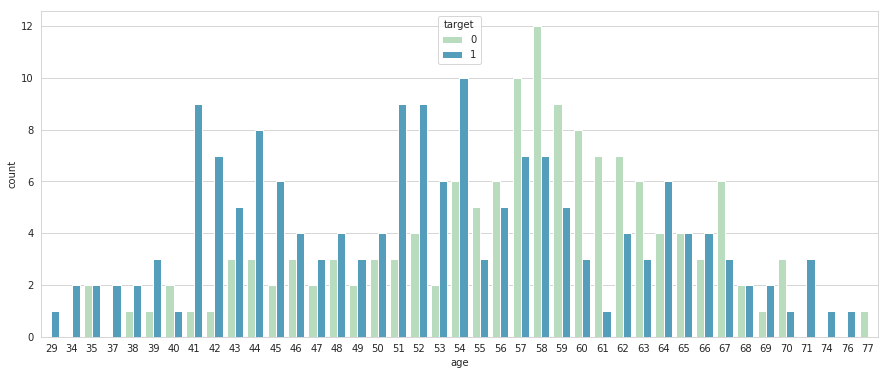

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

#### **5.Scatterplot для сравнения максимального пульса и уровня холестерина**

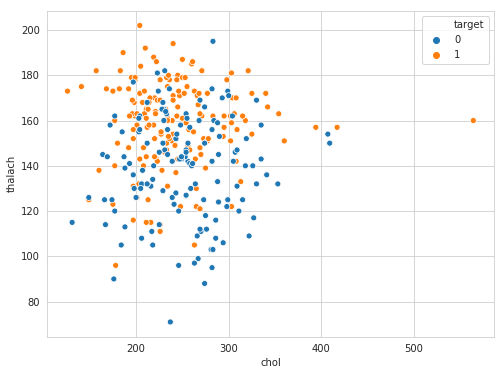

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

## **Корреляция** ##

In [4]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


На основе корреляционной матрицы можно сделать вывод, что признаки практически на связаны друг с другом